In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

(0.0, 25.0)

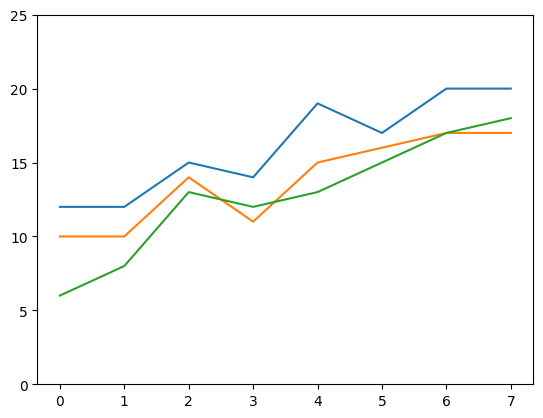

In [3]:
def get_bools(path):
    df = pd.read_csv(path)
    lister = []
    for i in range(len(df)):
        true_list = np.isin(np.array(df["shown_words"][i].split(",")), np.array(df["recalled_words"][i].split(","))).astype(np.int32)
        lister.append(true_list)

    lister = np.array(lister)
    return lister

a = get_bools("free_recall_baseline_alex.csv")
b = get_bools("free_recall_fast_05_carla.csv")
c = get_bools("free_recall_fast_05_alex.csv")

plt.plot(a.sum(0))
plt.plot(b.sum(0))
plt.plot(c.sum(0))
plt.ylim(0, 25)

(0.0, 1.0)

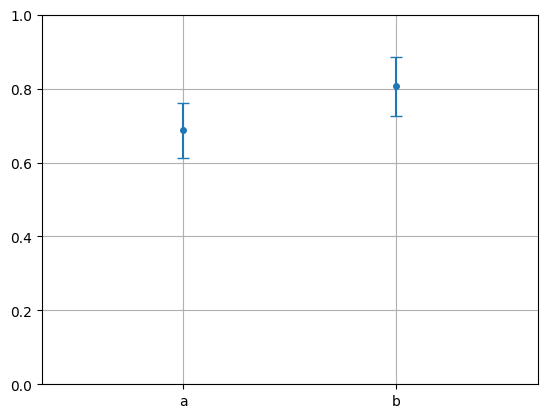

In [50]:
import numpy as np
from scipy import stats

def conf(data, total_guesses_per_round):
    n_rounds = len(data)
    proportions = data / total_guesses_per_round
    mean_prop = np.mean(proportions)
    std_prop = np.std(proportions, ddof=1)

    alpha = 0.05
    t_crit = stats.t.ppf(1 - alpha/2, df=n_rounds-1)
    margin = t_crit * (std_prop / np.sqrt(n_rounds))
    
    return mean_prop, margin

means = []
margins = []

for data in [a, b]:
    m, margin = conf(data.sum(1), 8)
    means.append(m)
    margins.append(margin)

x = range(len(means))
spacing = 1/(len(x)+1)
plt.errorbar(x, means, yerr=margins, fmt='o', markersize=4, capsize=4)
plt.grid()
plt.xlim(-2*spacing, 1+2*spacing)
plt.xticks(x, ["a", "b"])
plt.ylim(0, 1)